<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 03  </font></center></h1>
<h2><center> <font color='black'> Classification problems </font></center></h2>    
<h2><center> <font color='black'> Due date : 05 April 23:59 </font></center></h2>    

<h2><center> <font color='black'> BDA - University of Tartu - Spring 2020</font></center></h3>
</div>

# Homework instructions 

- Insert your team member names and student IDs in the field "Team mates" below. If you are not working in a team please insert only your name, surname and student ID 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close at 12:00 am, so please make sure you have enough time to submit the homework. 

- Only one of the teammates should submit the homework. We will grade and give points to both of you! 

- You do not necessarily need to work on Colab. Especially as the size and the complexity of datasets will increase through the course, you can install jupyter notebooks locally and work from there.

- If you do not understand what a question is asking for, please ask in Moodle. 


**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name Surname: XXXXX</font>&emsp;   <font color='red'>Student ID: YYYY</font>


<font color='red'>Name Surname: XXXXX</font>&emsp;   <font color='red'>Student ID: YYYY</font>


# 1. Classification tasks and algorithms (8 points)

We are going to use the dataset from the file HR_Employee_Attrition.csv which contains data about the employees of a company and the fact if they have left the company due to causes like retirement, resignation, elimination of a position, personal health etc. It is important for companies to predict if their employees are going to leave because the hiring process is costly and requires planification. The data has the following columns:


Age – self descriptive

BusinessTravel – how frequent employee travels

DailyRate – daily rate on terms of salary

Department – self descriptive

DistanceFromHome – distance between employee home and work

Education – education level of employee

EducationField – self descriptive

EnvironmentSatisfaction – level of satisfaction with working environment

Gender – self descriptive

HourlyRate – self descriptive

JobRole – self descriptive

JobInvolvement – level of interest of the job

JobSatisfaction – level of satisfaction with current job

MaritalStatus – self descriptive

MonthlyIncome – self descriptive

MonthlyRate – self descriptive

NumCompaniesWorked – self descriptive

Over18 – whether customer age is more than 18

OverTime – whether customer works overtime or not

PerformanceRating – performance level of employee

RelationshipSatisfaction – level of satisfaction with working community

StandardHours – standard amount of hours that employee works

TotalWorkingYears – whether customer age is more than 18

TrainingTimesLastYear – whether customer age is more than 18

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [0]:
hr_data = pd.read_csv('HR_Employee_Attrition.csv', header=0)
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Y,Yes,3,1,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,Y,No,4,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,3,2,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Y,Yes,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,9,Y,No,3,4,80,6,3,3,2,2,2,2


In [0]:
hr_data['Attrition'].replace(to_replace='Yes',value=1,inplace=True)
hr_data['Attrition'].replace(to_replace='No',value=0,inplace=True)

## 1.1 Dataset exploration (1.6 points)

**1.1.0.
Plot the correlation of the variables in the dataset with the Attrition variable. (0.4 points)**

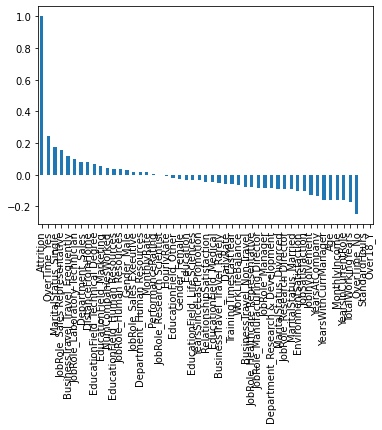

In [0]:
df_dum = pd.get_dummies(hr_data)
df_dum.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar')

**1.1.1. Write three interesting observation that you notice. Were they as you  expected ? Please elaborate your answer in 1 - 3 sentences. (0.4 points)**

**<font color='red'>Answer 1:</font>** 

**<font color='red'>Answer 2:</font>** 

**<font color='red'>Answer 3:</font>** 

**1.1.2 Make a boxplot for total working years for each type of Attrition values. (0.4 points)**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


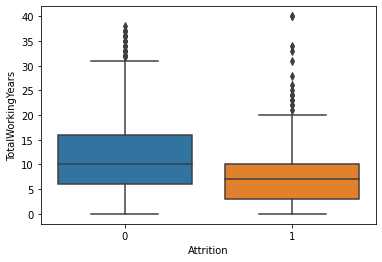

In [0]:
import seaborn as sns
sns.boxplot(x=hr_data.Attrition,y=hr_data.TotalWorkingYears)

**1.1.3. Plot the relative frequency of Attrition values (Yes/No)  (0.4 points)**

In [0]:
###change to make it better
hr_data['Attrition'].value_counts.plot(kind='hist')


## 1.2 Classification  (6.4 points)

We are going to predict the variable Attrition by trying different classification algorithms and comparing them. Before let's split the data into training and test set. Hint: You can apply some preprocessing as well to get better results.

In [0]:
#hr_data.drop(columns='StandardHours','Over18_Y')
from sklearn.model_selection import train_test_split 
df_dum=df_dum.drop(['StandardHours','Over18_Y'],axis=1)
y =df_dum['Attrition'] 
X = df_dum.drop(columns=['Attrition'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
hr_data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [0]:
X_test

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
442,36,635,10,4,2,32,3,4,9980,15318,1,3,4,10,3,2,10,3,9,7,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1091,33,575,25,3,4,44,2,2,4320,24152,1,3,4,5,2,3,5,3,0,2,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
981,35,662,18,4,4,67,3,3,4614,23288,0,3,3,5,0,2,4,2,3,2,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
785,40,1492,20,4,1,61,3,4,10322,26542,4,4,4,14,6,3,11,10,11,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1332,29,459,24,2,4,73,2,4,2439,14753,1,4,2,1,3,2,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,36,557,3,3,1,94,2,4,7644,12695,0,3,3,10,2,3,9,7,3,4,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
481,34,254,1,2,2,83,2,4,3622,22794,1,3,4,6,3,3,6,5,1,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
124,31,249,6,4,2,76,1,3,6172,20739,4,3,2,12,3,2,7,7,7,7,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
198,38,1261,2,4,4,88,3,3,6553,7259,9,3,2,14,3,3,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0


**1.2.1 Use the scikit-learn DecisionTreeClassifier with default parameters to predict the attrition value for the test set. Set the random seed to 0. Calculate the accuracy score and print it. (0.4 points)**

In [0]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import metrics

model=DT()
modelDT=model.fit(X_train,y_train)


In [0]:
from sklearn import metrics
prediction_test = modelDT.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(modelDT.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


**1.2.2 Plot the confusion matrix for the predicted values. Based on this matrix or your general knowledge, why accuracy is not a good metric to use in this case ? (0.4 points)**

In [0]:
y_pred = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix")
print(confusion_matrix)


 Confusion Matrix
[[214  31]
 [ 35  14]]


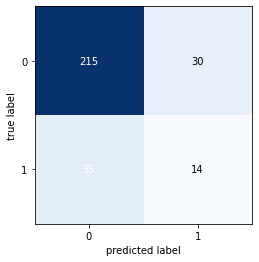

In [0]:
from mlxtend.plotting import plot_confusion_matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

binary = confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=binary)
plt.show()

**1.2.3 We want to use a dumy model (not a machine learning approach) to get 83.88% accuracy. Considering the label ratios how this model would look like ? (0.4 points)**

**<font color='red'>Answer 1:</font>** 

**1.2.4 It is possible to plot the decision tree by using different plotting libraries. We are using the https://pypi.org/project/graphviz/ and sklearn.tree. Install the package and complete the code below so you will get a visualisation of our decision tree. (0.4 points)**

In [0]:
list(df_dum.columns)

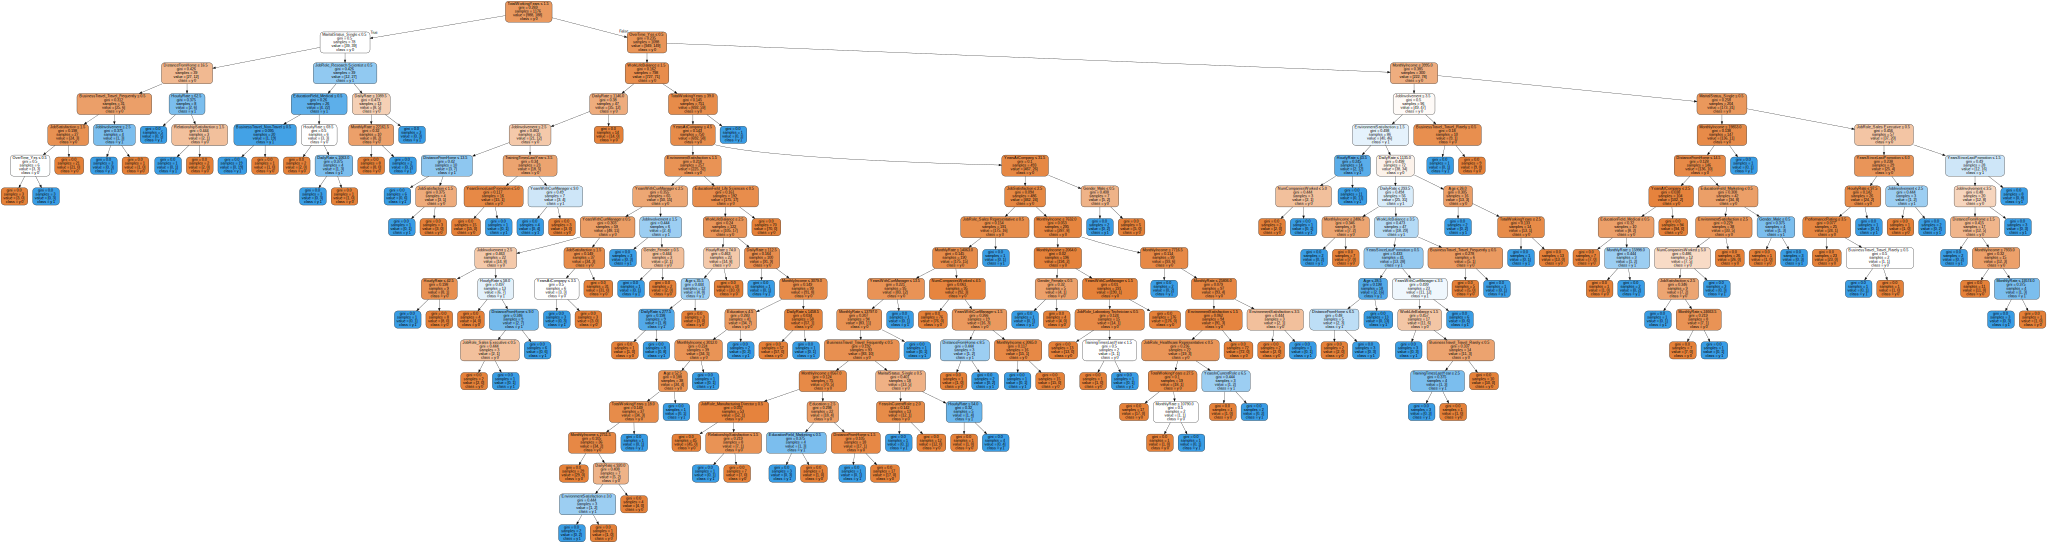

In [0]:

from sklearn.tree import export_graphviz
import graphviz
dot_prod = export_graphviz(modelDT, out_file=None,feature_names=X.columns.values,
                class_names=True, filled=True, rounded=True,
                special_characters=True)
#feature_names=df.columns
#df_names=list(df.columns.values) / list(X.columns.values)
graph = graphviz.Source(dot_prod)
graph

#optimizing the decision tree

In [0]:
#optimizing the decision tree
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8469387755102041


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


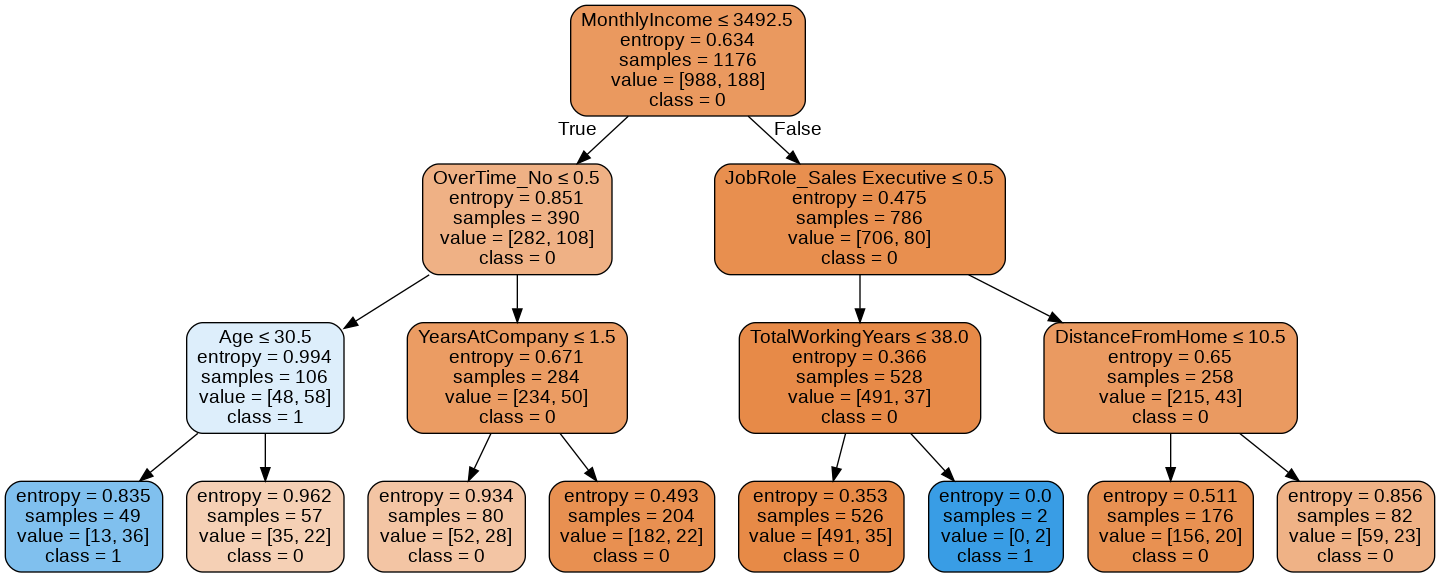

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns.values,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Attrition.png')
Image(graph.create_png())

**1.2.5 For the decision tree we modeled, what is the most important factor to decide if an employee is going to leave or not? (0.4 points)**

[0.02967272 0.06231104 0.05714458 0.01914702 0.03666483 0.05891555
 0.04838836 0.02675641 0.10648189 0.03716563 0.01523769 0.0029124
 0.00976075 0.         0.08078134 0.01589951 0.03578694 0.01973626
 0.01006514 0.03350039 0.04864682 0.00601473 0.0183755  0.01903911
 0.         0.         0.         0.         0.00546799 0.01351152
 0.01182653 0.         0.         0.0092859  0.01379318 0.00618488
 0.         0.00274356 0.         0.00067195 0.         0.01168854
 0.02116998 0.00534296 0.         0.         0.0500333  0.
 0.         0.04987511]


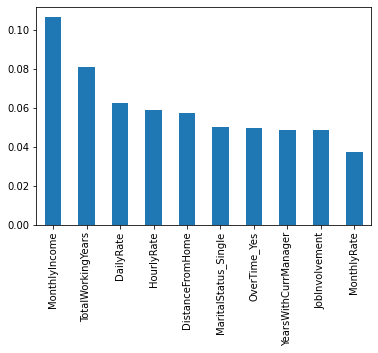

In [0]:
#feature_importance in the model to find the most important factor 
print(modelDT.feature_importances_)
feat_importances = pd.Series(modelDT.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

**<font color='red'>Answer 1:</font>** It is MonthlyIncome

**1.2.6 Plot the classification report for the decision tree. In this case study which one out of  precision and recall, would you consider more important ? Please elaborate your answer. (0.4 points)**

Average precision-recall score: 0.25


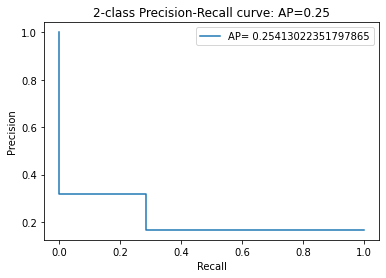

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(modelDT, X_test, y_test,label="AP= "+str(average_precision))
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.legend()

In [0]:
#try with the optimized data as well 

In [0]:
metrics.precision_score(y_test, y_pred)

0.6428571428571429

In [0]:
metrics.recall_score(y_test,y_pred)

0.1836734693877551

**<font color='red'>Answer 1:</font>** Precision is more important, because the model is better if we predict those employees who are gonna leave, so that we can plan to recruit new people or we can promote/motivate them to stay. 




**1.2.7 Calculate the F1 score of the model in training data and compare it with the F1 score in test  data. What is the effect happening ? (0.4 points)**

In [0]:
from sklearn.metrics import f1_score
#check the above data

print('for test data')
print(f"F1_score macro: {f1_score(y_test, y_pred, average='macro')}")
print(f"\nF1_score micro: {f1_score(y_test, y_pred, average='micro')}")
print(f"\nF1_score weighted: {f1_score(y_test, y_pred, average='weighted')}")
print(f"\nF1_score:{f1_score(y_test,y_pred)}")

print('\nfor training data')
y_prediction = model.predict(X_train)
print(f"F1_score macro: {f1_score(y_train, y_prediction, average='macro')}")
print(f"\nF1_score micro: {f1_score(y_train, y_prediction, average='micro')}")
print(f"\nF1_score weighted: {f1_score(y_train, y_prediction, average='weighted')}")
print(f"\nF1_score:{f1_score(y_train,y_prediction)}")



for test data
F1_score macro: 0.6

F1_score micro: 0.8469387755102041

F1_score weighted: 0.8095238095238095

F1_score:0.28571428571428575

for training data
F1_score macro: 1.0

F1_score micro: 1.0

F1_score weighted: 1.0

F1_score:1.0


**<font color='red'>Answer 1:</font>** F1 score for training data is bigger than that of test data. 

**1.2.8 We can use cross validation scores to ensure that our model is generalizing well and we can be more confident when we apply it in test data. We will now try different combinations of maximum depth parameters for the decision tree and choose the best while using cross validation. Please complete the code below and report the best maximum depth. (0.4 points)**

In [0]:
#TAKE A LOOK
from sklearn.model_selection import cross_val_score
best_score = 0
best_depth = 0
for i in range(5,20):
    clf = DT(max_depth=i, random_state = 0)
    # Perform 5-fold cross validation. 
    
    # The number of folds you want to use generally depends from the size of data
    scores = cross_val_score(estimator= clf, scoring="f1", X=X, y=y, cv=5)
    mean_score = scores.mean()
    #best_score=highest(mean_score)
    if best_score <mean_score:
      best_score=mean_score
      best_depth=i
    # TODO

    print('Mean score', mean_score)

print('\n The best tree depth is: ', best_depth )

Mean score 0.3531767508969919
Mean score 0.3668537418823191
Mean score 0.36982448654533234
Mean score 0.32675003417523724
Mean score 0.3685394650378653
Mean score 0.3610594655186685
Mean score 0.3696751877602941
Mean score 0.3640599978188298
Mean score 0.3563965814456698
Mean score 0.3500033323536281
Mean score 0.34749310317012183
Mean score 0.3430922018276454
Mean score 0.3409109163340969
Mean score 0.34446857792325497
Mean score 0.34446857792325497

 The best tree depth is:  7


In [0]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import MinMaxScaler

features = X.columns.values

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X)

X_scaled = pd.DataFrame(scaler.transform(X))

X_scaled.columns = features

# Create Train & Test Data for Logistic Regression
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)


**1.2.9 Use SVM with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. Set the random_state equal to 0. (0.4 points)**

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model_svm = SVC(random_state=0) 
model_svm.fit(X_scaled_train,y_scaled_train)
preds = model_svm.predict(X_scaled_test)
print('Accuracy of Support Vecor Machine (SVM) on test set: ', metrics.accuracy_score(y_scaled_test, preds))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_scaled_test,preds)) 

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(modelDT, X_test, y_test,label="AP= "+str(average_precision))
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.legend()

In [0]:

from sklearn.metrics import f1_score

print(f"F1_score macro: {f1_score(y_test, y_pred, average='macro')}")
print(f"\nF1_score micro: {f1_score(y_test, y_pred, average='micro')}")
print(f"\nF1_score weighted: {f1_score(y_test, y_pred, average='weighted')}")

**1.2.10 Use Logistic Regression with default parameters to classify test data and report accuracy, recall, precision, f1-score, AUC. Set the random_state equal to 0 (0.4 points)**

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_scaled_train, y_scaled_train)

In [0]:
from sklearn import metrics
print('Accuracy:'.format(model.score(X_scaled_test, y_scaled_test)))
y_pred = model.predict(X_scaled_test)
confusion_matrix = metrics.confusion_matrix(y_scaled_test, y_pred)
print("Confusion Matrix")
print(confusion_matrix)

Accuracy:
Confusion Matrix
[[362   9]
 [ 44  26]]


In [0]:
print('Precision:',metrics.precision_score(y_scaled_test,y_pred))

Precision: 0.7428571428571429


In [0]:
print('Recall:',metrics.recall_score(y_test,y_pred))

In [0]:
from sklearn.metrics import f1_score
print(f"F1_score macro: {f1_score(y_test, y_pred)}")

**1.2.11 One of the parameters for the Logistic regression is tol which sets the tolerance for the stopping criteria. We are going to calculate the log loss metric for different values of tol. Please fill in the code below and plot the log loss values. Which one of tol values is better for our model based on log loss? (0.4 points)**


In [0]:
from sklearn.metrics import log_loss
probs = model.predict_proba(X_test)
probs = probs[:, 1]
loss = log_loss(y_test, probs)
loss

0.43376789372131497

In [0]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import log_loss
from sklearn import metrics
log_losss = []
for x in [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]:
    lr = LR(tol = x, random_state = 0 ).fit(X,y)
    prediction_test = lr.predict(X_test)
    loss = log_loss(y_test, x)
    #log_loss(y_test, probs)
    #if k<lr.score(y_test,prediction_test):
      #k=lr.score(y_test,prediction_test)
    #print(k)
    #log_loss.append(k)
print(log_loss)



**<font color='red'>Answer 1:</font>** 


**1.2.12 Use Random Forest with default parameters to classify test data and report accuracy, recall, precision and f1-score and AUC. Set the random_state equal to 0. Please build as well a classification report separately which shows the metrics for each class. (0.4 points)**

In [0]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: ', metrics.accuracy_score(y_test, prediction_test))

Accuracy of Random Forest classifier on test set:  0.8605442176870748


In [0]:
from sklearn.metrics import f1_score
print('F1 score: ',f1_score(y_test,prediction_test))

F1 score:  0.30508474576271183


In [0]:
from sklearn.metrics import precision_recall_fscore_support

In [0]:
precision_recall_fscore_support(y_test, prediction_test)

In [0]:
#class0
precision_recall_fscore_support(y_test, prediction_test, pos_label=0,average='binary')

(0.8501742160278746, 0.9959183673469387, 0.9172932330827066, None)

In [0]:
#class1
precision_recall_fscore_support(y_test, prediction_test, pos_label=1,average='binary')

(0.8571428571428571, 0.12244897959183673, 0.21428571428571427, None)

**1.2.13 Get the probabilities for each class from Random Forest model. Threshold the probabilities such that it will output the class No  only if the model is 70% or higher confident. In all other cases it will predict the class Yes. (0.4 points)**


In [0]:
#NOT CORRECT AT ALL: do it again

from sklearn.metrics import log_loss
probs=model_rf.predict_proba(X_test)


**1.2.14 Build again the classification matrix. Do you think there were some improvements regarding the classification for class Yes ? Explain your answer briefly. (0.4 points)**

In [0]:
confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
print("Confusion Matrix")
print(confusion_matrix)

#NUMBER DOESNT CHANGE

Confusion Matrix
[[216  29]
 [ 34  15]]


**<font color='red'>Answer 1:</font>** 

**1.2.15 Use XGBoost with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. (0.4 points)**

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [0]:
xgb_model = XGBClassifier()

xgb_model.fit(X_train,y_train)
prediction_xgb = model.predict(X_test)

print(metrics.accuracy_score(y_test,prediction_xgb))
print(metrics.confusion_matrix(y_test,prediction_xgb))


0.7653061224489796
[[211  34]
 [ 35  14]]


In [0]:
X_test

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
442,36,635,10,4,2,32,3,4,9980,15318,1,3,4,10,3,2,10,3,9,7,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1091,33,575,25,3,4,44,2,2,4320,24152,1,3,4,5,2,3,5,3,0,2,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
981,35,662,18,4,4,67,3,3,4614,23288,0,3,3,5,0,2,4,2,3,2,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
785,40,1492,20,4,1,61,3,4,10322,26542,4,4,4,14,6,3,11,10,11,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1332,29,459,24,2,4,73,2,4,2439,14753,1,4,2,1,3,2,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,36,557,3,3,1,94,2,4,7644,12695,0,3,3,10,2,3,9,7,3,4,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
481,34,254,1,2,2,83,2,4,3622,22794,1,3,4,6,3,3,6,5,1,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
124,31,249,6,4,2,76,1,3,6172,20739,4,3,2,12,3,2,7,7,7,7,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
198,38,1261,2,4,4,88,3,3,6553,7259,9,3,2,14,3,3,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [0]:
print('Precision: ',metrics.precision_score(y_test,prediction_xgb))
print('Recall: ',metrics.recall_score(y_test,prediction_xgb))

Precision:  0.2916666666666667
Recall:  0.2857142857142857


In [0]:
from sklearn.metrics import f1_score
print('F1 score: ',f1_score(y_test,prediction_xgb))

F1 score:  0.9


**1.2.16 Based on your answer from 1.2.6 and other important evaluation metrics for unbalanced datasets, choose the best classifier and plot its feature importances in decreasing order. Were the 3 most important features as you expected ? Please explain why. (0.4 points)**

[0.03012053 0.02132257 0.02176753 0.01117287 0.02503293 0.01965139
 0.02401766 0.02224794 0.03329514 0.01889847 0.02295465 0.00925892
 0.01940466 0.         0.0284898  0.01705744 0.02609514 0.02305354
 0.02184208 0.02049058 0.02609015 0.02106321 0.02310716 0.03402695
 0.03618903 0.01582682 0.02959715 0.         0.01447807 0.01730772
 0.02339475 0.         0.01948929 0.0198204  0.         0.01492134
 0.         0.01699209 0.00973832 0.02630275 0.         0.02931249
 0.05087952 0.01930589 0.02141072 0.0097109  0.04035884 0.
 0.06450259 0.        ]


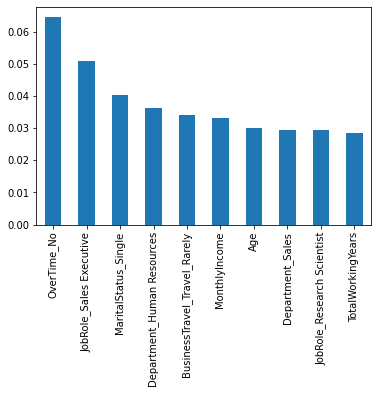

In [0]:
print(xgb_model.feature_importances_)
feat_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

**<font color='red'>Answer 1:</font>** first, i think xgbboost is the best classifier, because it produces the highest precision value. 
The 3 most important features are: OverTime_No, JobRole_Sales Executive and MaritalStatus_Single
this is not what i expected. The decision tree above (the optimized one), it showed differently.

# 2. Improving classification (2 points)

In this task we will try to improve the performance of the best classifier you selected on 1.2.12 by using several techniques. 

**2.1 Do you think it is better to try oversampling or downsampling in this case study and why ? (0.4 points)** 

**<font color='red'>Answer 1:</font>** Oversampling

**2.2 Apply oversampling to the data while keeping random_state equal to 0. (0.4 points)**

In [0]:
count_class_0, count_class_1 = df_dum.Attrition.value_counts()
df_class_0 = df_dum[df_dum['Attrition'] == 0]
df_class_1 = df_dum[df_dum['Attrition'] == 1]

Random over-sampling:
0    1233
1     237
Name: Attrition, dtype: int64


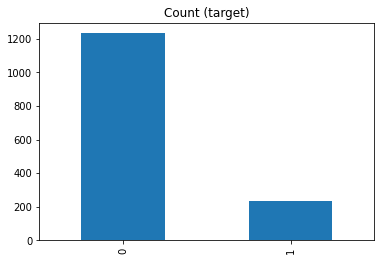

In [0]:
df_class_1_under = df_class_1.sample(count_class_1,replace=True)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random over-sampling:')
print(df_test_under.Attrition.value_counts())

df_test_under.Attrition.value_counts().plot(kind='bar', title='Count (target)');

**2.3 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Use the algorithm chosen in 1.2.12 and report accuracy, precision, recall, f1-score and AUC. (0.4 points)** 

In [0]:
from sklearn.model_selection import train_test_split 
y =df_dum['Attrition'] 
X = df_dum.drop(columns=['Attrition'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

**2.4 Apply undersampling to the data while keeping random_state equal to 0. (0.4 points)**

Random under-sampling:
1    237
0    237
Name: Attrition, dtype: int64


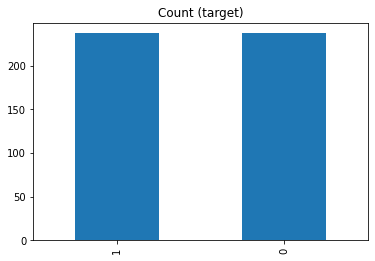

In [0]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Attrition.value_counts())

df_test_under.Attrition.value_counts().plot(kind='bar', title='Count (target)');

**2.5 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Use the algorithm chosen in 1.2.12 to classify the test data and report accuracy, precision, recall, f1-score and AUC. (0.4 points)** 

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer:**</font>

**<font color='red'>(please change X in the next cell into your estimate)</font>**

X hours

## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:**</font>